<a href="https://colab.research.google.com/github/Rio-HEPLab/ML4Physics/blob/PPGF-2025-1/14-AutoEncoder-Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rede Auto-Encoder
<img src="https://github.com/Rio-HEPLab/ML4Physics/blob/PPGF-2025-1/pics/AE-Architecture.png?raw=true" width=500>
<img src="https://github.com/Rio-HEPLab/ML4Physics/blob/PPGF-2025-1/pics/AE-Dimensional-Reduction.png?raw=true" width=450>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
import sklearn
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers
from keras.callbacks import History
from keras.callbacks import TensorBoard
from IPython.display import Image, SVG
print (tensorflow.__version__)

# Set training parameters
nepochs = 20
batchsize = 128
encoding_dim = 32
# encoding_dim = 16

2.18.0


In [ ]:
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_valid, X_train = X_train[:10000], X_train[10000:]
# y_valid, y_train = y_train[:10000], y_train[10000:]
# plt.hist( y_valid )

In [ ]:
# Prepare our input data using MNIST digits discarding the labels (since we're only interested in encoding/decoding the input images)
# Loads the training and test data sets (ignoring class labels)
(X_train, _), (X_test, _) = mnist.load_data()
X_valid, X_train = X_train[:10000], X_train[10000:]

# Scales the training and test data to range between 0 and 1.
# max_value = float( X_train.max() )
max_value = 255
X_train = X_train.astype('float32') / max_value
X_valid = X_valid.astype('float32') / max_value
X_test = X_test.astype('float32') / max_value

# Data set consists 3D arrays with 60K training and 10K test images.
# with a resolution of 28 x 28 (pixels).
print ( X_train.shape, X_valid.shape, X_test.shape )
# (50000, 28, 28) (10000, 28, 28) (10000, 28, 28)

# Reshape the 28 x 28 images into vectors of length 784
X_train = X_train.reshape( ( len(X_train), np.prod( X_train.shape[1:] ) ) )
X_valid = X_valid.reshape( ( len(X_valid), np.prod( X_valid.shape[1:] ) ) )
X_test = X_test.reshape( ( len(X_test), np.prod( X_test.shape[1:] ) ) )
print ( X_train.shape, X_valid.shape, X_test.shape )
# (50000, 784) (10000, 784) (10000, 784)

# input dimension = 784
input_dim = X_train.shape[1]
print ( "Enonding dimensional: {}, compression: {}".format( encoding_dim, ( encoding_dim/input_dim ) ) )

(50000, 28, 28) (10000, 28, 28) (10000, 28, 28)
(50000, 784) (10000, 784) (10000, 784)
Enonding dimensional: 32, compression: 0.04081632653061224


In [ ]:
# Auto-Encoder Model

# input placeholder
input_img = Input(shape=(784,))

autoencoder = Sequential()

# Encoder Layers
autoencoder.add(Dense(4 * encoding_dim, input_shape=(input_dim,), activation='relu'))
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(encoding_dim, activation='relu'))

# Decoder Layers
autoencoder.add(Dense(2 * encoding_dim, activation='relu'))
autoencoder.add(Dense(4 * encoding_dim, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))
autoencoder.summary()

####################################################

# ENCODER MODEL
input_img = Input(shape=(input_dim,))
encoder_layer1 = autoencoder.layers[0]
encoder_layer2 = autoencoder.layers[1]
encoder_layer3 = autoencoder.layers[2]
encoder = Model(input_img, encoder_layer3(encoder_layer2(encoder_layer1(input_img))))
encoder.summary()

# DECODER MODEL
encoded_img = Input(shape=(encoding_dim,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
decoder = Model(encoded_img, decoder_layer3(decoder_layer2(decoder_layer1(encoded_img))))
decoder.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,568 (435.81 KB)

 Trainable params: 111,568 (435.81 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# TRAINING

# Configure model to use a per-pixel binary crossentropy loss, and the Adam optimizer
autoencoder.compile( optimizer='adam',
                     loss='binary_crossentropy' )

#  train our autoencoder
auto = autoencoder.fit( X_train, X_train,
                        epochs=nepochs,
                        batch_size=batchsize,
                        shuffle=True,
                        validation_data=(X_valid, X_valid) )


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.2998 - val_loss: 0.1471
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1424 - val_loss: 0.1290
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1266 - val_loss: 0.1175
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1167 - val_loss: 0.1121
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1115 - val_loss: 0.1077
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1070 - val_loss: 0.1045
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1043 - val_loss: 0.1020
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1017 - val_loss: 0.1005
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1001 - val_loss: 0.0989
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0983 - val_loss: 0.0974
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0973 - val_loss: 0.0959
Epoch 12/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

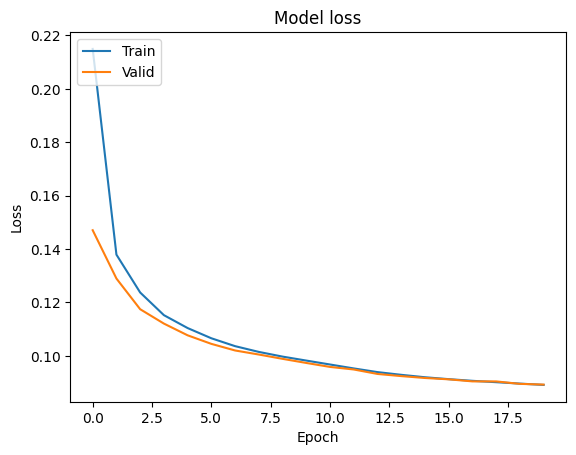

In [ ]:
# Plot training & validation loss values
plt.plot(auto.history['loss'])
plt.plot(auto.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


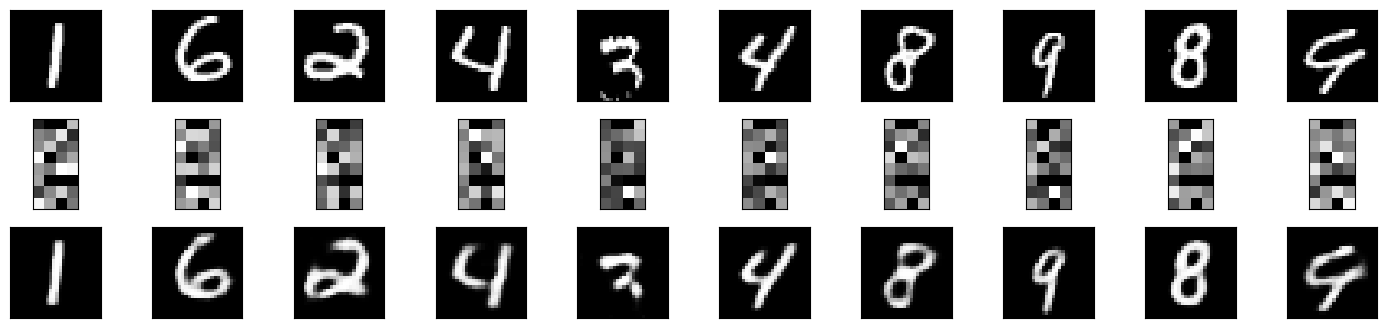

In [ ]:
num_images = 10
np.random.seed(42)
random_test_images = np.random.randint( X_test.shape[0], size=num_images )

encoded_imgs = encoder.predict( X_test )
decoded_imgs = decoder.predict( encoded_imgs )
#decoded_imgs = autoencoder.predict(x_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(3, num_images, i + 1)
    plt.imshow( X_test[image_idx].reshape(28, 28) )
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot encoded image
    ax = plt.subplot(3, num_images, num_images + i + 1)
    plt.imshow( encoded_imgs[image_idx].reshape( encoding_dim//4, 4 ) )
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # plot reconstructed image
    ax = plt.subplot(3, num_images, 2*num_images + i + 1)
    plt.imshow( decoded_imgs[image_idx].reshape(28, 28) )
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Clusterização

In [ ]:
from sklearn.cluster import KMeans

k_means = KMeans( n_clusters=10 )
k_means.fit( encoded_imgs )
print ( k_means.labels_ )
print ( k_means.cluster_centers_ )

[6 0 7 ... 6 1 3]
[[ 6.9646606   0.          0.         13.008853    7.4182887  12.148804
  13.66663    12.528492    9.788388   13.266604    5.105774    6.9930253
  13.3499775   0.          9.943682    8.685513   14.248804    8.647172
  10.215913    7.499119    8.485631    0.24596605  0.          0.
  13.904537    9.721609   10.839758   10.603504    8.877372   11.285218
   0.         11.010902  ]
 [ 7.8451166   0.          0.          8.066837    5.8370523   8.262358
   9.984865    7.935688    7.702527   10.537151    4.2934475   5.255174
   9.452883    0.         10.548794    6.9001026   9.296467    8.560116
   6.07707     6.833418    6.669716    0.79442275  0.          0.
   7.4288507   7.1165843  10.13792     9.033669    8.145611    8.8599825
   0.          8.226701  ]
 [ 8.098547    0.          0.         15.473028    9.497799    6.791154
  11.726431    8.430083    7.645629   17.718468    6.189967    5.2839723
  17.556505    0.         11.714334    7.990946   13.198748    6.7766047


In [ ]:
df = pd.DataFrame( encoded_imgs )

clusters = k_means.predict( encoded_imgs )
print ( clusters )

df['cluster'] = clusters

[6 0 7 ... 6 1 3]


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,cluster
0,12.060571,0.0,0.0,7.106766,7.199493,11.921637,8.026260,13.704689,5.915946,14.228730,...,0.0,9.672489,6.536829,14.363695,6.618752,17.924112,4.887360,0.0,15.061728,6
1,7.883773,0.0,0.0,14.241195,9.002534,18.834927,14.809762,7.916135,18.073107,20.763733,...,0.0,13.919680,14.670984,14.297335,9.893218,7.931903,10.504316,0.0,10.200501,0
2,1.617685,0.0,0.0,13.347711,12.790513,2.797629,14.658036,9.699015,9.083877,13.987007,...,0.0,2.904984,11.497480,15.498488,9.589541,13.404326,9.113619,0.0,11.304735,7
3,10.725201,0.0,0.0,9.193582,6.291706,16.745907,15.308453,8.478891,15.026949,12.855905,...,0.0,18.373293,15.468972,17.117342,13.236509,11.302761,17.288794,0.0,17.628326,3
4,11.012851,0.0,0.0,8.443376,5.666922,14.988426,13.564914,15.836023,10.118598,6.017766,...,0.0,7.246596,11.544358,7.643980,10.752278,8.635466,8.261342,0.0,5.804019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6.826989,0.0,0.0,15.099133,9.365421,15.885952,9.881124,16.786509,14.480392,9.865124,...,0.0,20.717173,14.602452,10.503540,11.530927,8.839068,13.415343,0.0,19.969269,8
9996,11.813115,0.0,0.0,17.500616,12.103132,22.237709,16.062883,17.748491,10.367494,16.661259,...,0.0,21.573895,16.115160,16.191835,16.845932,13.855570,17.686033,0.0,19.477322,8
9997,14.539096,0.0,0.0,9.647158,7.799831,3.644963,14.572090,6.779142,8.874153,13.407309,...,0.0,11.389391,5.121838,12.752082,10.245976,12.774579,5.495283,0.0,14.394611,6
9998,9.347841,0.0,0.0,10.933797,2.015543,8.568062,11.556687,3.612555,3.944969,13.538381,...,0.0,13.015495,8.975945,19.970434,13.940925,8.699360,9.685106,0.0,9.980394,1


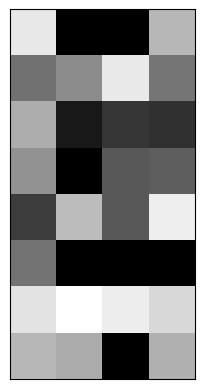

In [ ]:
idx = 100
img_ = df.drop(['cluster'],axis=1).iloc[idx].to_numpy()
plt.imshow( img_.reshape( encoding_dim//4, 4 ) )
plt.gray()
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

In [ ]:
# pd.plotting.parallel_coordinates( df, 'cluster' )

In [ ]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)
PCs_2d = pd.DataFrame( pca_2d.fit_transform( encoded_imgs ) )
PCs_2d.columns = ["PC1_2d", "PC2_2d"]
PCs_2d['cluster'] = clusters
PCs_2d

,PC1_2d,PC2_2d,cluster
0,-5.056767,4.727056,6
1,2.413685,-2.770565,0
2,-8.304058,8.311604,7
3,13.955620,-4.679293,3
4,-4.841930,-1.857211,1
...,...,...,...
9995,10.786831,-2.655636,8
9996,27.130260,1.580771,8
9997,-1.275883,2.681153,6
9998,-8.142216,-1.098769,1


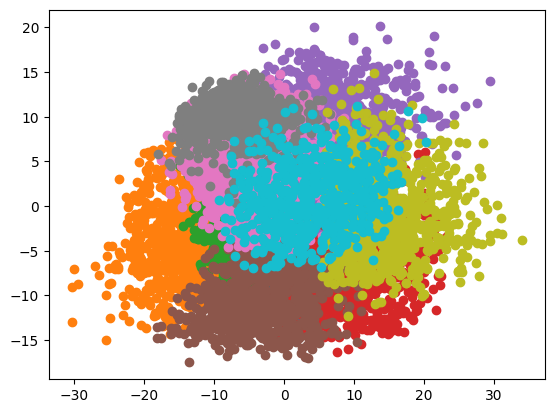

In [ ]:
for icluster in range(10):
    msk_ = PCs_2d.cluster == icluster
    plt.plot( PCs_2d[ 'PC1_2d' ][ msk_ ], PCs_2d[ 'PC2_2d' ][ msk_ ], 'o' )

In [ ]:
pca_3d = PCA(n_components=3)
PCs_3d = pd.DataFrame( pca_3d.fit_transform( encoded_imgs ) )
PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]
PCs_3d['cluster'] = clusters
PCs_3d

,PC1_3d,PC2_3d,PC3_3d,cluster
0,-5.056767,4.727056,-7.863696,6
1,2.413685,-2.770565,11.762724,0
2,-8.304058,8.311604,9.983166,7
3,13.955620,-4.679293,-2.282991,3
4,-4.841930,-1.857211,-9.467488,1
...,...,...,...,...
9995,10.786831,-2.655636,8.550871,8
9996,27.130260,1.580771,5.194976,8
9997,-1.275883,2.681153,-4.099522,6
9998,-8.142216,-1.098769,0.907957,1


/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


(-0.04, 0.04)

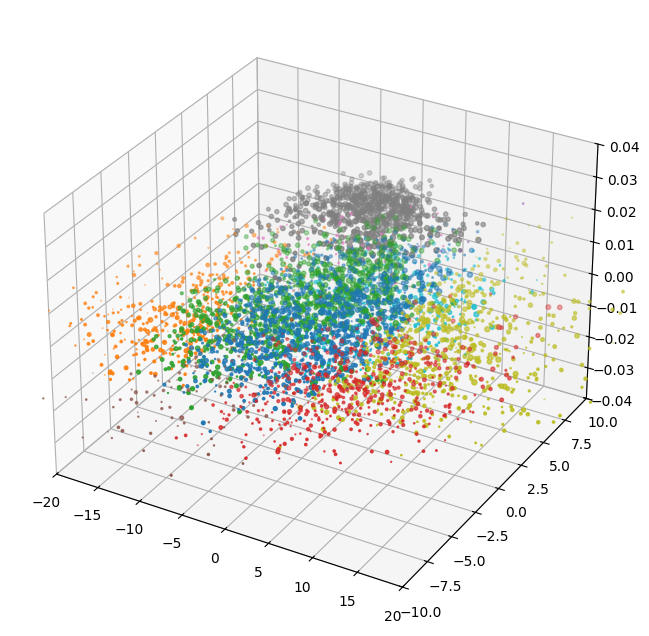

In [ ]:
fig = plt.figure( figsize=(10,8) )
ax = fig.add_subplot(projection='3d')

for icluster in range(10):
    msk_ = PCs_3d.cluster == icluster
    plt.scatter( PCs_3d[ 'PC1_3d' ][ msk_ ], PCs_3d[ 'PC2_3d' ][ msk_ ], PCs_3d[ 'PC3_3d' ][ msk_ ], marker='o' )
ax.set_xlim( -20., 20. )
ax.set_ylim( -10., 10. )
ax.set_zlim( -0.04, 0.04 )